In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [11]:
df=pd.read_csv("stores_data.csv")

In [12]:
df

,name,amt,place,date
0,sai,100.0,Restaurant,05-10-2024
1,sai,30.0,groccery store,10-12-2024
2,sai,70.0,restaurant,05-01-2024
3,sai,20.0,coffee shop,10-03-2024
4,sai,40.0,groccery store,10-04-2024
5,sai,25.0,groccery store,10-06-2024
6,NaN,NaN,NaN,NaN


In [13]:
df.drop(index=6,inplace=True)

In [14]:
df

,name,amt,place,date
0,sai,100.0,Restaurant,05-10-2024
1,sai,30.0,groccery store,10-12-2024
2,sai,70.0,restaurant,05-01-2024
3,sai,20.0,coffee shop,10-03-2024
4,sai,40.0,groccery store,10-04-2024
5,sai,25.0,groccery store,10-06-2024


In [15]:
df['date'] = pd.to_datetime(df['date'], format='%d-%m-%Y')


In [16]:
df

,name,amt,place,date
0,sai,100.0,Restaurant,2024-10-05
1,sai,30.0,groccery store,2024-12-10
2,sai,70.0,restaurant,2024-01-05
3,sai,20.0,coffee shop,2024-03-10
4,sai,40.0,groccery store,2024-04-10
5,sai,25.0,groccery store,2024-06-10


In [19]:
df['month_yr']= df['date'].dt.to_period('M')

In [20]:
df

,name,amt,place,date,month,month_yr
0,sai,100.0,Restaurant,2024-10-05,2024-10,2024-10
1,sai,30.0,groccery store,2024-12-10,2024-12,2024-12
2,sai,70.0,restaurant,2024-01-05,2024-01,2024-01
3,sai,20.0,coffee shop,2024-03-10,2024-03,2024-03
4,sai,40.0,groccery store,2024-04-10,2024-04,2024-04
5,sai,25.0,groccery store,2024-06-10,2024-06,2024-06


In [22]:
df.drop("month",axis=1,inplace=True)

In [23]:
df

,name,amt,place,date,month_yr
0,sai,100.0,Restaurant,2024-10-05,2024-10
1,sai,30.0,groccery store,2024-12-10,2024-12
2,sai,70.0,restaurant,2024-01-05,2024-01
3,sai,20.0,coffee shop,2024-03-10,2024-03
4,sai,40.0,groccery store,2024-04-10,2024-04
5,sai,25.0,groccery store,2024-06-10,2024-06


In [29]:
monthly_spending = df.groupby(['month_yr', 'place ']).agg({'amt': 'sum'}).reset_index()

In [30]:
monthly_spending

,month_yr,place,amt
0,2024-01,restaurant,70.0
1,2024-03,coffee shop,20.0
2,2024-04,groccery store,40.0
3,2024-06,groccery store,25.0
4,2024-10,Restaurant,100.0
5,2024-12,groccery store,30.0


In [34]:
last_3_months = df['month_yr'].sort_values().unique()[-3:]
last_3_months_spending = monthly_spending[monthly_spending['month_yr'].isin(last_3_months)]
last_3_months_spending

,month_yr,place,amt
3,2024-06,groccery store,25.0
4,2024-10,Restaurant,100.0
5,2024-12,groccery store,30.0


In [35]:
last_6_months = df['month_yr'].sort_values().unique()[-6:]
last_6_months_spending = monthly_spending[monthly_spending['month_yr'].isin(last_6_months)]

last_6_months_spending

,month_yr,place,amt
0,2024-01,restaurant,70.0
1,2024-03,coffee shop,20.0
2,2024-04,groccery store,40.0
3,2024-06,groccery store,25.0
4,2024-10,Restaurant,100.0
5,2024-12,groccery store,30.0


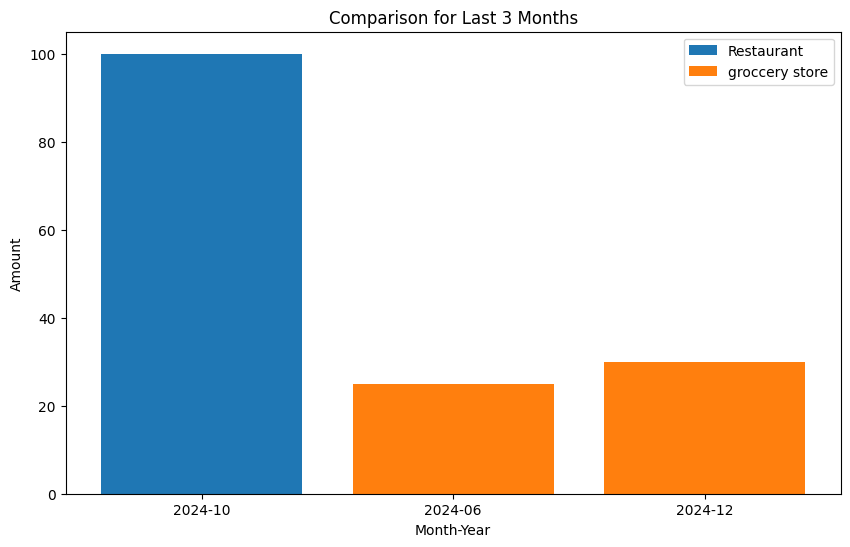

In [45]:
plt.figure(figsize=(10, 6))
for place, group in last_3_months_spending.groupby('place '):
    plt.bar(group['month_yr'].astype(str), group['amt'], label=place)

plt.title('Comparison for Last 3 Months')
plt.xlabel('Month-Year')
plt.ylabel('Amount')
plt.legend()
plt.show()

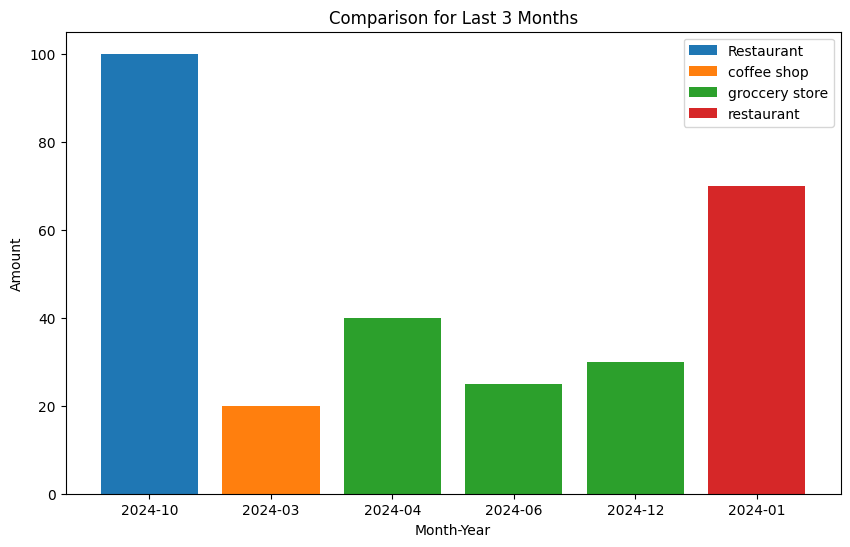

In [46]:
plt.figure(figsize=(10, 6))
for place, group in last_6_months_spending.groupby('place '):
    plt.bar(group['month_yr'].astype(str), group['amt'], label=place)

plt.title('Comparison for Last 3 Months')
plt.xlabel('Month-Year')
plt.ylabel('Amount')
plt.legend()
plt.show()

In [48]:
print("Spending for the Last 3 Months:")
for index, row in last_3_months_spending.iterrows():
    print(f"On {row['month_yr']}: Sai spent {row['amt']} at {row['place ']}")


Spending for the Last 3 Months:
On 2024-06: Sai spent 25.0 at groccery store
On 2024-10: Sai spent 100.0 at Restaurant
On 2024-12: Sai spent 30.0 at groccery store


In [59]:
previous_month_data = {}
for index, row in last_6_months_spending.iterrows():
    current_place = row['place ']
    current_amt = row['amt']
    if current_place in previous_month_data:
        previous_amt = previous_month_data[current_place]
        diff = current_amt - previous_amt
        if diff > 0:
            print(f"Coming to {row['month_yr'].month}th month, Sai spent {current_amt} Rs at {current_place} that is {diff} Rs more than the previous visit.")
        elif diff < 0:
            print(f"Coming to {row['month_yr'].month}th month, Sai spent {current_amt} Rs at {current_place} that is {-diff} Rs less than the previous visit.")
        else:
            print(f"Coming to {row['month_yr'].month}th month, Sai spent {current_amt} Rs at {current_place} which is the same amount as the previous visit.")
    else:
        print(f"Coming to {row['month_yr'].month}th month, Sai spent {current_amt} Rs at {current_place} for the first time.")
    previous_month_data[current_place] = current_amt


Coming to 1th month, Sai spent 70.0 Rs at restaurant for the first time.
Coming to 3th month, Sai spent 20.0 Rs at coffee shop for the first time.
Coming to 4th month, Sai spent 40.0 Rs at groccery store for the first time.
Coming to 6th month, Sai spent 25.0 Rs at groccery store that is 15.0 Rs less than the previous visit.
Coming to 10th month, Sai spent 100.0 Rs at Restaurant for the first time.
Coming to 12th month, Sai spent 30.0 Rs at groccery store that is 5.0 Rs more than the previous visit.
